<a href="https://colab.research.google.com/github/srikanthpeddapalli/E-mail-spam-ham-classifier/blob/main/email_spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/drive/MyDrive/mail/mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:




df.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [8]:


df["Category"]=encoder.fit_transform(df["Category"])

In [9]:
df.Category

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [10]:


df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:

df.isna().sum()

Category    0
Message     0
dtype: int64

In [12]:

df.duplicated().sum()

415

In [13]:

df=df.drop_duplicates(keep="first")

In [14]:


df.duplicated().sum()

0

In [15]:

target=df.value_counts()

In [16]:

target

Category  Message                                                                                                                              
0         &lt;#&gt;  am I think? Should say on syllabus                                                                                            1
          Thanx u darlin!im cool thanx. A few bday drinks 2 nite. 2morrow off! Take care c u soon.xxx                                              1
          Thanks for loving me so. You rock                                                                                                        1
          Thanks for looking out for me. I really appreciate.                                                                                      1
          Thanks for being there for me just to talk to on saturday. You are very dear to me. I cherish having you as a brother and role model.    1
                                                                                                               

([<matplotlib.patches.Wedge at 0x7f39dd846d90>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.4187065709816749, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364083, '12.43')])

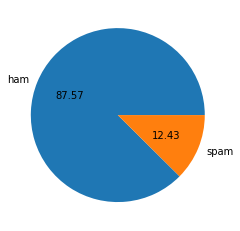

In [17]:

plt.pie(df["Category"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [18]:

import nltk

In [19]:

df["Message"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [20]:



df["num_character"]=df["Message"].apply(len)

In [21]:



df.head()

,Category,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df["Message"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [23]:


import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
df["num_words"]=df["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,Category,Message,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df["num_sentence"]=df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,Category,Message,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[["num_character","num_sentence","num_words"]].describe()

,num_character,num_sentence,num_words
count,5157.000000,5157.000000,5157.000000
mean,79.103936,1.950553,18.557882
std,58.382922,1.362981,13.406024
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,61.000000,1.000000,15.000000
75%,118.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [30]:
#spam
df[df["Category"]==1][["num_character","num_sentence","num_words"]].describe()

,num_character,num_sentence,num_words
count,641.000000,641.000000,641.000000
mean,137.118565,2.967239,27.667707
std,30.399707,1.480241,7.103501
min,7.000000,1.000000,2.000000
25%,130.000000,2.000000,25.000000
50%,148.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,223.000000,8.000000,46.000000


In [31]:
#ham
df[df["Category"]==0][["num_character","num_sentence","num_words"]].describe()

,num_character,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.869353,1.806244,17.264836
std,56.708301,1.281910,13.587852
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,53.000000,1.000000,13.000000
75%,91.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [32]:
import seaborn as sns

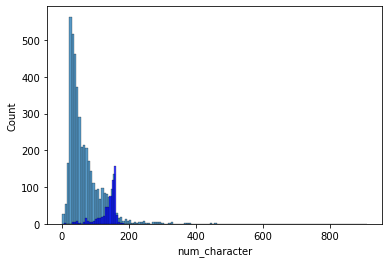

In [33]:
sns.histplot(df[df["Category"]==0]["num_character"])
sns.histplot(df[df["Category"]==1]["num_character"],color="blue")

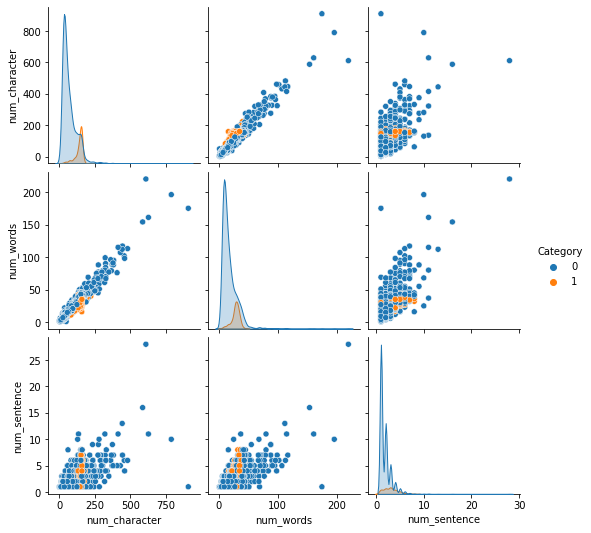

In [34]:
sns.pairplot(df,hue="Category")

In [35]:
df.corr()

,Category,num_character,num_words,num_sentence
Category,1.000000,0.374409,0.256038,0.281055
num_character,0.374409,1.000000,0.966164,0.636615
num_words,0.256038,0.966164,1.000000,0.683371
num_sentence,0.281055,0.636615,0.683371,1.000000


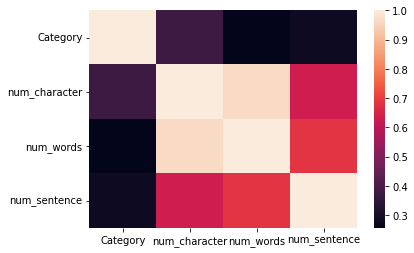

In [36]:
sns.heatmap(df.corr())

In [37]:
def transform_text(text):
  text=text.lower()
  return text

In [38]:
transform_text("Srikanth how are you reee")

'srikanth how are you reee'

In [39]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  return text

In [40]:
transform_text("HII HOW ARE YOW REE FUCK OFF REE")

['hii', 'how', 'are', 'yow', 'ree', 'fuck', 'off', 'ree']

In [41]:
df.head()

,Category,Message,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df["Message"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()



  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  
  return " ".join(y)
          
      


In [62]:
transform_text("hii you are is 20#@")

'hii 20'

In [61]:
transform_text("Im an 20@")

'im 20'

In [48]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
transform_text("hii how are you")

'hii'

In [59]:
transform_text("how are yow Srikanth 233")

'yow srikanth 233'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [63]:
transform_text("peddapalli srikanth is Dancing")

'peddap srikanth danc'

In [64]:
df["Message"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

In [65]:
df["transformed_text"]=df["Message"].apply(transform_text)

In [66]:
df.head()

,Category,Message,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=800,min_font_size=50,background_color="white")
             

In [68]:
spam_wc=wc.generate(df[df["Category"]==1]["transformed_text"].str.cat(sep=" "))

In [69]:
rrr=WordCloud().generate("Message")

In [70]:
rrr

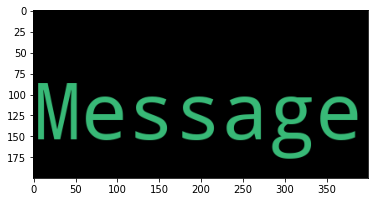

In [71]:
plt.imshow(rrr)

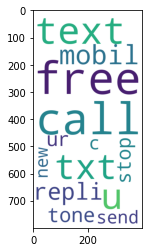

In [72]:
plt.imshow(spam_wc)

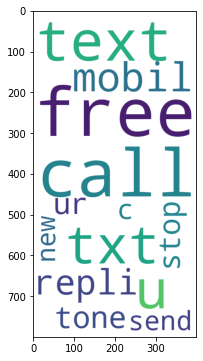

In [73]:
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

In [74]:
ham_wc=wc.generate(df[df["Category"] == 0]["transformed_text"].str.cat(sep=" "))

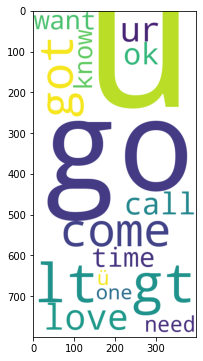

In [75]:
plt.figure(figsize=(14,6))
plt.imshow(ham_wc)

In [76]:
df[df["Category"]==1]["transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [77]:

spam_corpus=[]
for msg in df[df["Category"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [78]:
len(spam_corpus)

9781

In [79]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [80]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


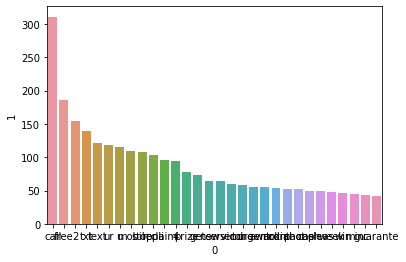

In [81]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [82]:
ham_corpus=[]
for msg in df[df["Category"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [83]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [84]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 138),
 ('tell', 133)]

In [85]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


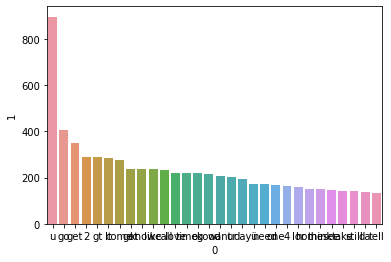

In [86]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

In [87]:
#Model building

In [88]:
df.head()

,Category,Message,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer()

In [90]:
x=tfid.fit_transform(df["transformed_text"]).toarray()

In [91]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
x.shape

(5157, 6781)

In [93]:
y=df["Category"].values

In [94]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [101]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [102]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [103]:
gnb.fit(x_train,y_train)

GaussianNB()

In [104]:
y_pred1=gnb.predict(x_test)

In [105]:
accuracy_score(y_test,y_pred1)

0.8837209302325582

In [106]:
confusion_matrix(y_test,y_pred1)

array([[792, 104],
       [ 16, 120]])

In [107]:
precision_score(y_test,y_pred1)

0.5357142857142857

In [108]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9631782945736435
[[896   0]
 [ 38  98]]
1.0


In [109]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680232558139535
[[890   6]
 [ 27 109]]
0.9478260869565217


In [110]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [111]:
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9699612403100775
[[893   3]
 [ 28 108]]
0.972972972972973


In [112]:
import pickle
pickle.dump(tfid,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))

In [114]:
! pip install streamlit




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
%%writefile app.py
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()



  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  
  return " ".join(y)
          
tfidf=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('model.pkl','rb'))

st.title("Email/Ham/Spam Classifier")
input_sms=st.text_input("Enter the message")

if st.button("Predict"):

   transform_sms=transform_text(input_sms)
   vector_input=tfidf.transform([transform_sms])
   result=model.predict(vector_input)[0]
   if result==1:
      st.header("Spam")
   else:
      st.header("Ham")



Writing app.py


In [116]:
!streamlit run app.py & npx localtunnel ---port 8501

2022-08-12 09:01:17.524 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 6.411s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.87.103:8501

your url is: https://funny-months-invent-34-125-87-103.loca.lt
  Stopping...
^C
